In [1]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [2]:
# Importing to a data frame.
df = pd.read_csv('2024_10_1_LAB-2_Spectral_Data.csv')
print(df)

      Wavelength (nm)  Group1_White_Paper  Group1_Epidote1  Group1_Epidote2  \
0                 350               0.408            0.134            0.053   
1                 351               0.403            0.123            0.048   
2                 352               0.393            0.127            0.042   
3                 353               0.377            0.133            0.043   
4                 354               0.370            0.116            0.058   
...               ...                 ...              ...              ...   
2146             2496               0.387            0.222            0.109   
2147             2497               0.386            0.220            0.108   
2148             2498               0.388            0.219            0.109   
2149             2499               0.390            0.220            0.110   
2150             2500               0.391            0.219            0.110   

      Group1_Epidote3  Group2_Gypsum1  Group2_Gypsu

In [3]:
print(df.columns.values)

list_lambda = df[df.columns.values[0]].values
list_ref = df["ref"].values

['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1'
 'Group1_Epidote2' 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2'
 'Group2_Gypsum3' 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3'
 'Group4_Realgar1' 'Group4_Realgar2' 'Group4_Realgar3'
 'Group5_Hornblende1' 'Group5_Hornblende2' 'Group5_Hornblende3'
 'Group6_Pyrite1' 'Group6_Pyrite2' 'Group6_Pyrite3']


KeyError: 'ref'

In [6]:
import colour
import matplotlib.colors as mcolors

def wavelength_to_hex(wavelength):
    # Convert wavelength to XYZ color space
    xyz = colour.wavelength_to_XYZ(wavelength)
    
    # Convert XYZ to RGB
    rgb = colour.XYZ_to_sRGB(xyz)
    
    # Ensure RGB values are within bounds (0, 1) and then scale to (0, 255)
    rgb = [max(0, min(1, c)) for c in rgb]
    rgb = [int(c * 255) for c in rgb]
    
    # Convert to hex
    hex_color = mcolors.to_hex([x / 255.0 for x in rgb])
    
    return hex_color

# Example: Convert 500 nm (greenish) to hex
wavelength = 500  # Wavelength in nanometers
hex_color = wavelength_to_hex(wavelength)
print(f"Wavelength {wavelength} nm corresponds to hex color {hex_color}")


Wavelength 500 nm corresponds to hex color #00cd81


['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1' 'Group1_Epidote2'
 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2' 'Group2_Gypsum3'
 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3' 'Group4_Realgar1'
 'Group4_Realgar2' 'Group4_Realgar3' 'Group5_Hornblende1'
 'Group5_Hornblende2' 'Group5_Hornblende3' 'Group6_Pyrite1'
 'Group6_Pyrite2' 'Group6_Pyrite3']
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3


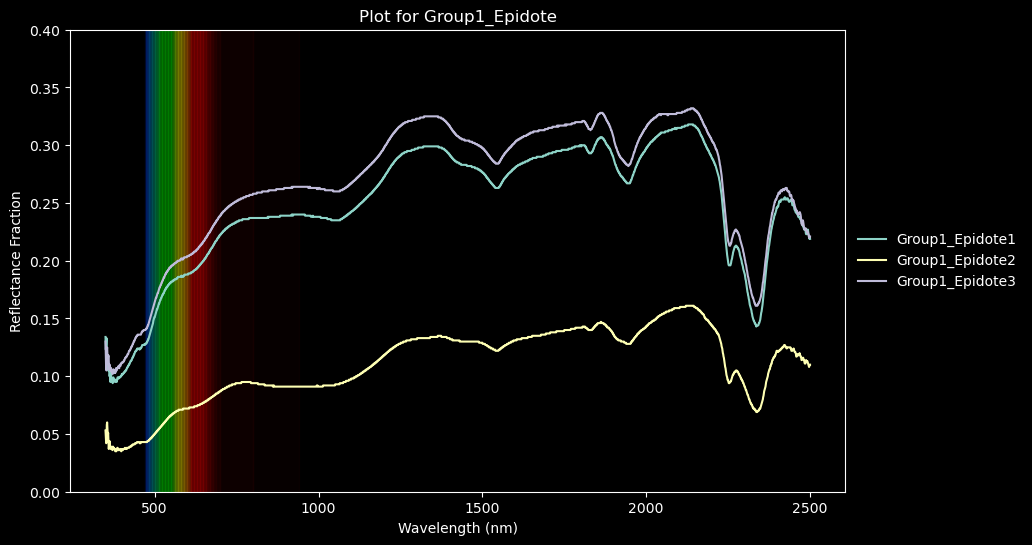

2
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3


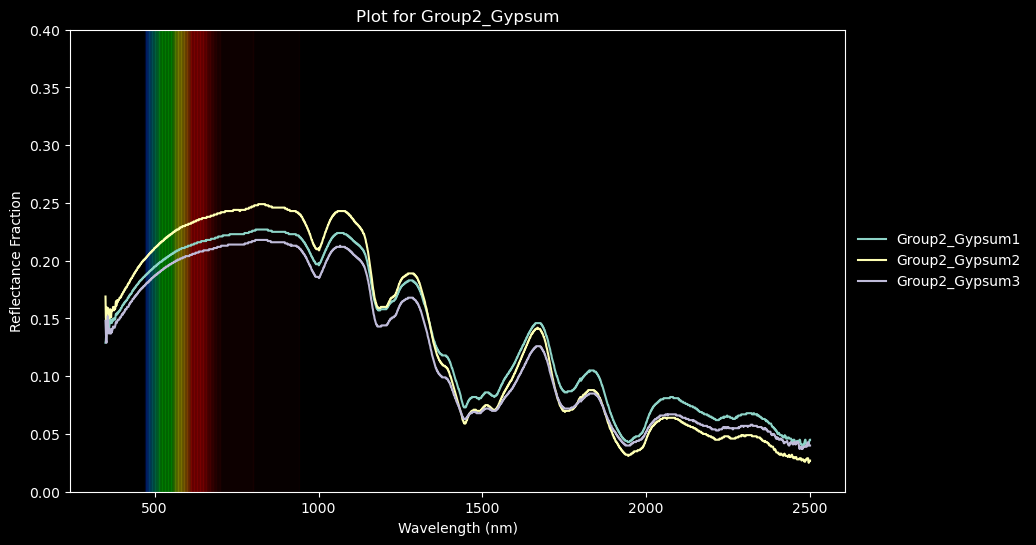

5
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3


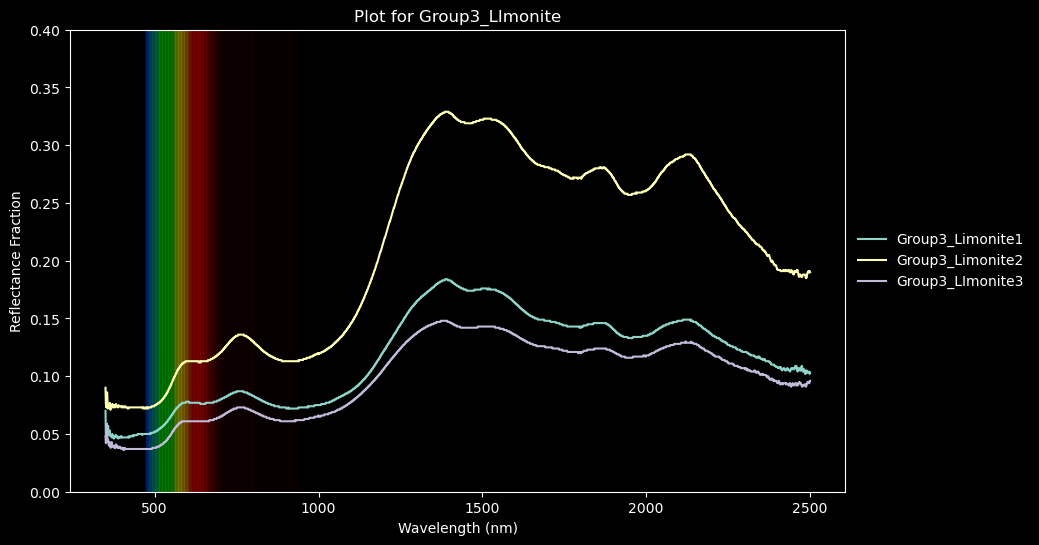

8
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3


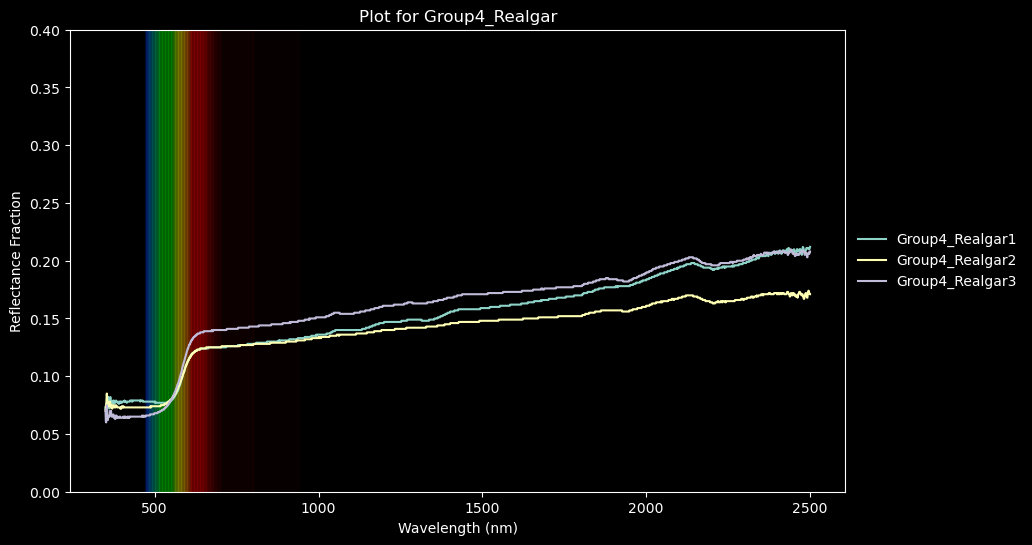

11
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3


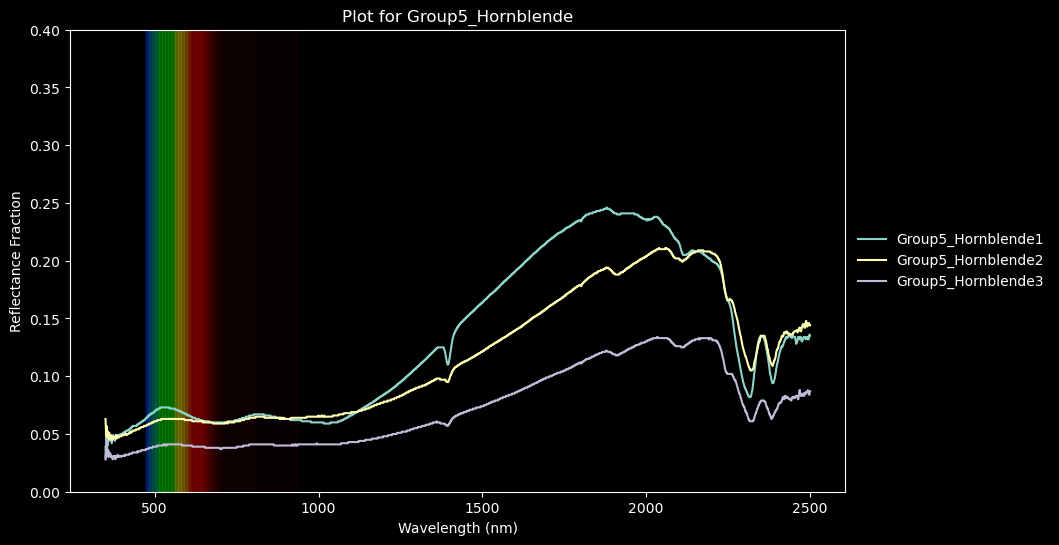

14
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


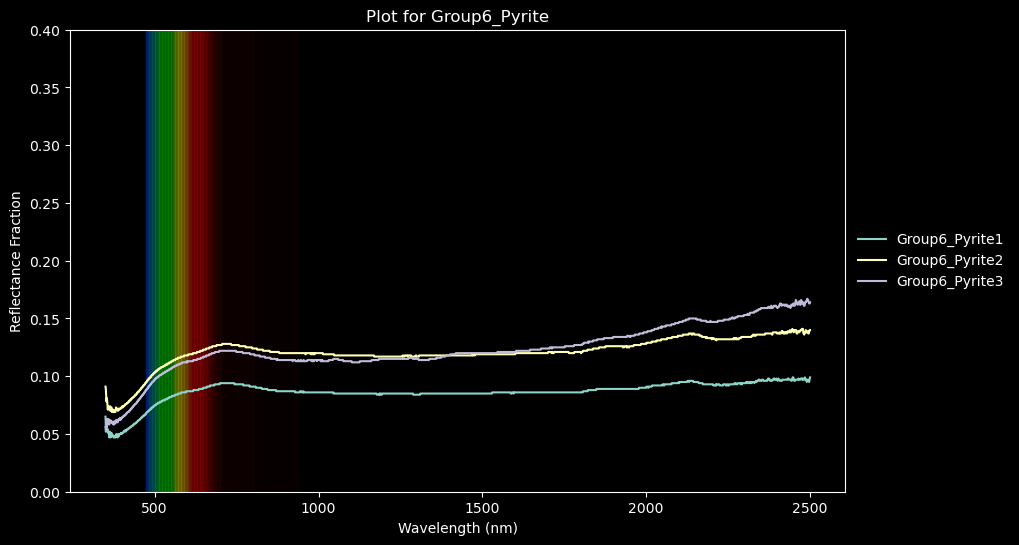

17
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


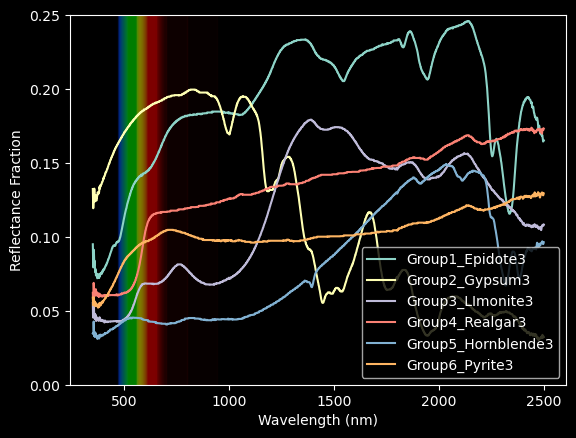

Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


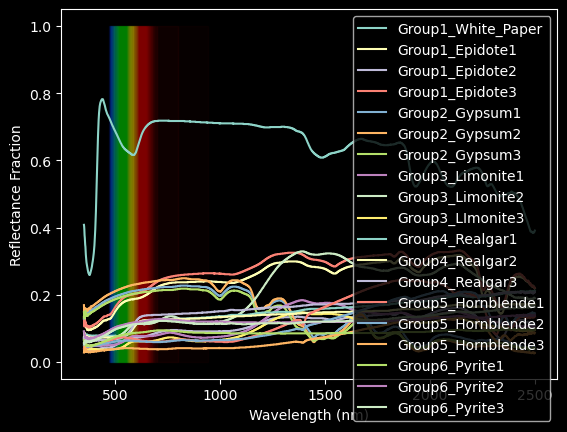

Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


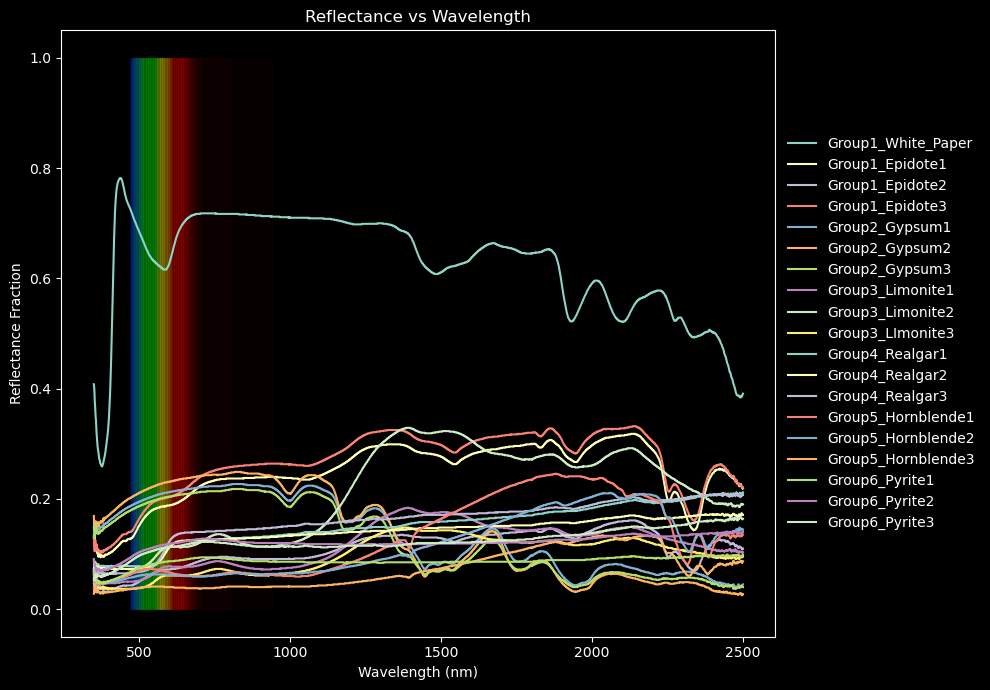

In [24]:
print(df.columns.values)

plt.style.use('dark_background')
def plt_spec():    
    # Wavelength range for the plot
    x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    # Create a plot
    #fig, ax = plt.subplots(figsize=(10, 7))
    
    # Loop over each color range and create a rectangle with the corresponding color
    for i in range(len(x)-1):
        color = wavelength_to_hex(x[i])
        a = x[i]+1
        plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)
    
    color_ranges = {
        'IRed': (700, 800),
        'IRed2': (800, 940)
    }
    
    # Define the corresponding colors
    color_map = {
        'IRed': '#440000',
        'IRed2': '#220000'
    }
    # Wavelength range for the plot
    x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    
    # Loop over each color range and create a rectangle with the corresponding color
    for color, (start_wl, end_wl) in color_ranges.items():
        plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")

    plt.figsize=(10, 7)

j=0
k=2
avg=0
for i in df.columns.values[2:]:
  
    if j == 0:
        plt.figure(figsize=(10, 6))
        plt_spec()

    j=j+1

    print(i)
    plt.plot(list_lambda,df[i].values,label=i)
    if j >= 3:
        plt.ylim(0,0.4)
        # Set the axis limits and labels
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Reflectance Fraction")
        
        #ax.set_yticks([])  # Remove y-axis ticks
        plt.title(f"Plot for {i[:-1]}")
        
        # Display the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

        plt.show()
        
        j=0
        avg=0
        print(k)
        k=k+3

    
        
j=0
avg=0
for i in df.columns.values[2:]:
    j=j+1
    avg = (df[i].values + avg)/2
    print(i)
    if j >= 3:
        plt.plot(list_lambda,avg,label=i)

        j=0
        avg=0


plt.ylim(0,0.25)

# Set the axis limits and labels

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("")
plt_spec()
# Display the plot
plt.legend()
plt.show()

       
j=0
avg=0
for i in df.columns.values[1:]:
    print(i)

    plt.plot(list_lambda,df[i].values,label=i)


# Set the axis limits and labels

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("")
plt_spec()
# Display the plot
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
j = 0
avg = 0
for i in df.columns.values[1:]:
    print(i)
    plt.plot(list_lambda, df[i].values, label=i)

# Set the axis limits and labels
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")
plt.title("Reflectance vs Wavelength")

# Customizing the plot appearance (assuming plt_spec() is your style function)
plt_spec()

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Display the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


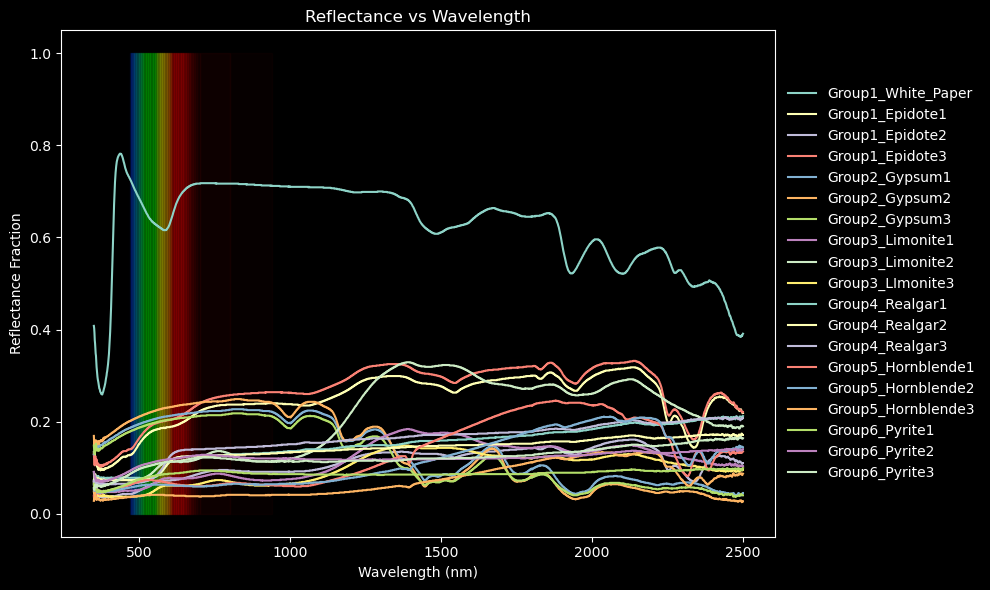

In [22]:
plt.figure(figsize=(10, 6))
j = 0
avg = 0
for i in df.columns.values[1:]:
    print(i)
    plt.plot(list_lambda, df[i].values, label=i)

# Set the axis limits and labels
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")
plt.title("Reflectance vs Wavelength")

# Customizing the plot appearance (assuming plt_spec() is your style function)
plt_spec()

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Display the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1' 'Group1_Epidote2'
 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2' 'Group2_Gypsum3'
 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3' 'Group4_Realgar1'
 'Group4_Realgar2' 'Group4_Realgar3' 'Group5_Hornblende1'
 'Group5_Hornblende2' 'Group5_Hornblende3' 'Group6_Pyrite1'
 'Group6_Pyrite2' 'Group6_Pyrite3']


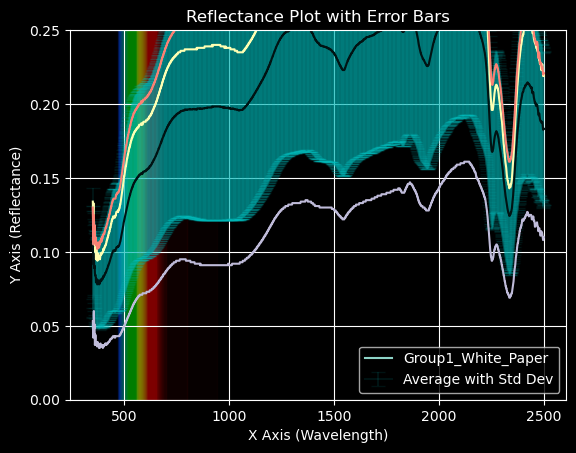

Group1_Epidote1
Group1_Epidote2
Group1_Epidote3


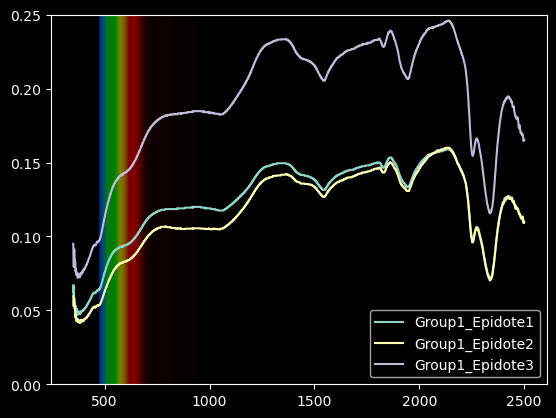

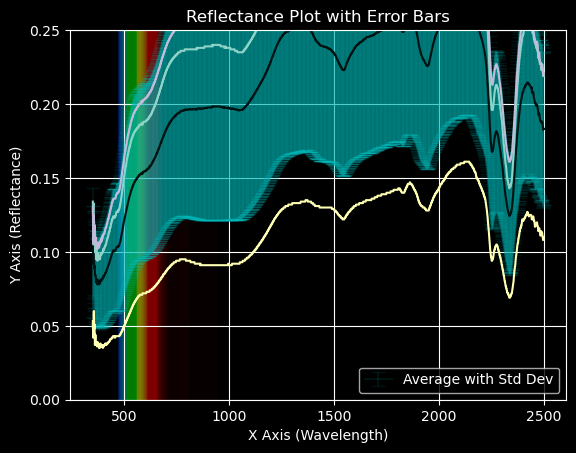

2
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3


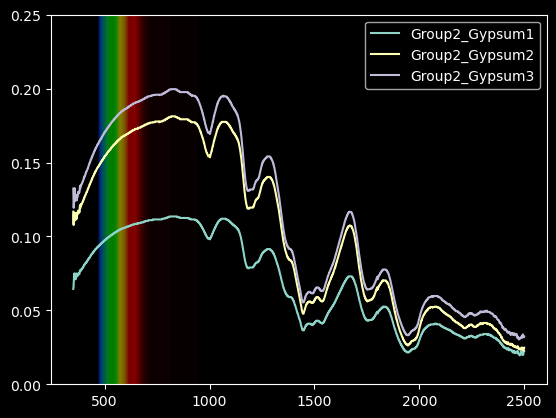

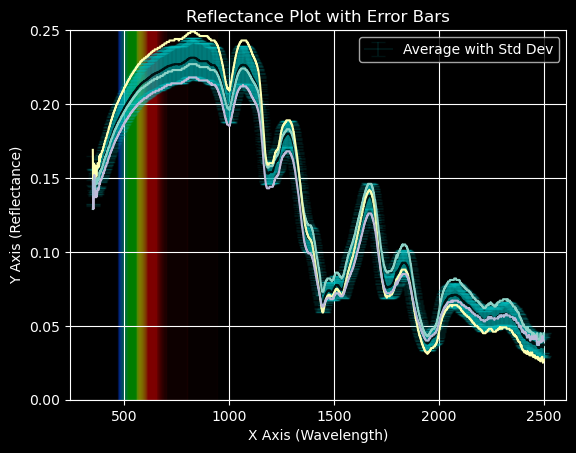

5
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3


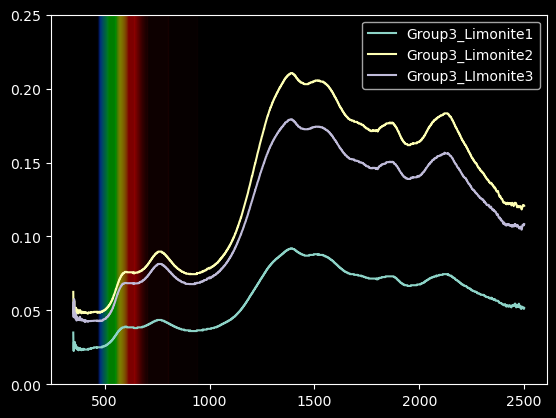

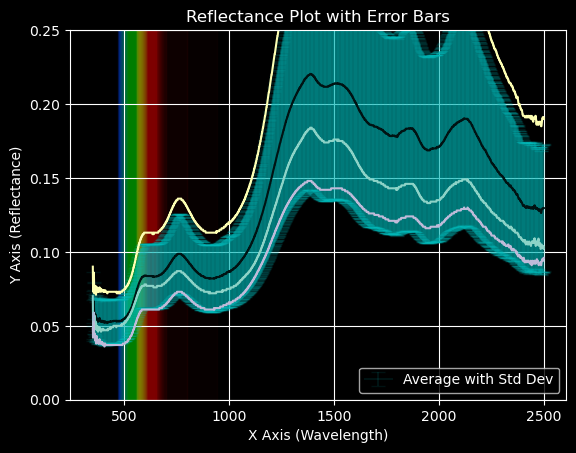

8
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3


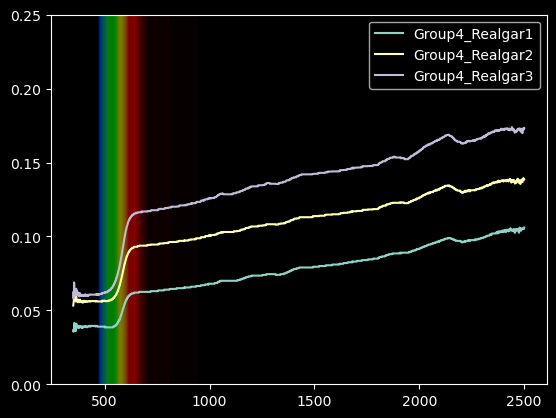

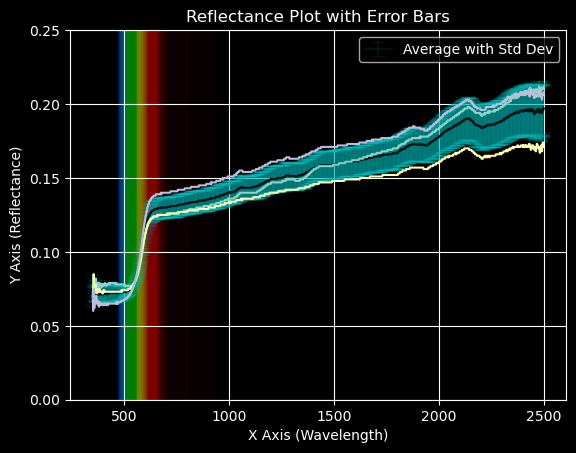

11
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3


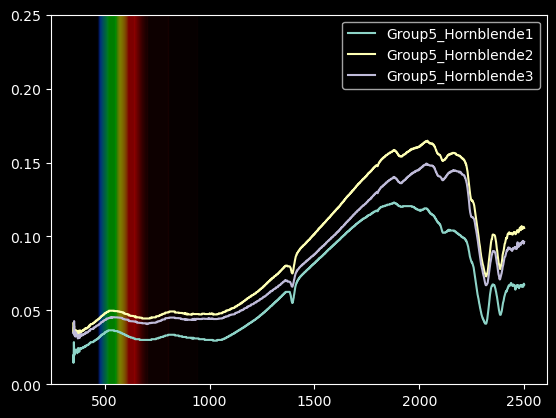

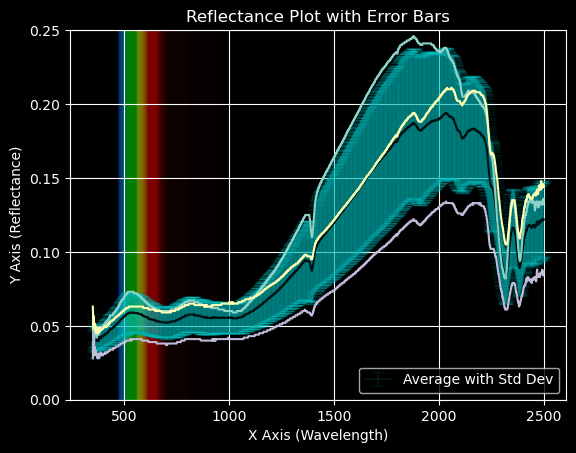

14
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


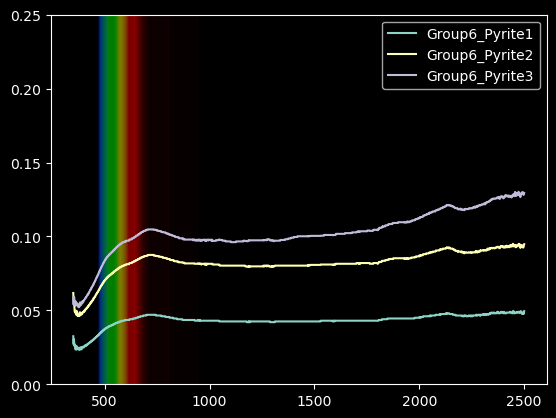

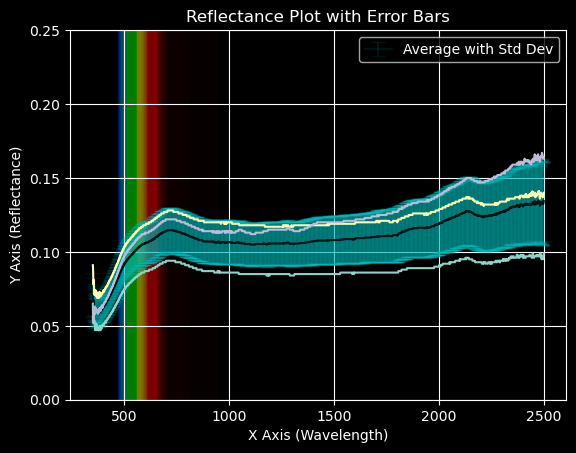

17
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


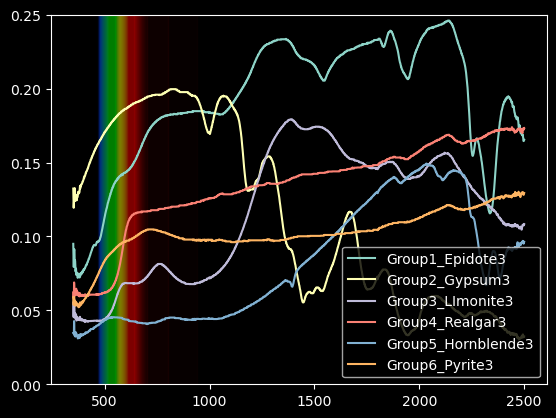

In [58]:
print(df.columns.values)

plt.style.use('dark_background')
def plt_spec():    
    # Wavelength range for the plot
    x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    # Create a plot
    #fig, ax = plt.subplots(figsize=(10, 7))
    
    # Loop over each color range and create a rectangle with the corresponding color
    for i in range(len(x)-1):
        color = wavelength_to_hex(x[i])
        a = x[i]+1
        plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)
    
    color_ranges = {
        'IRed': (700, 800),
        'IRed2': (800, 940)
    }
    
    # Define the corresponding colors
    color_map = {
        'IRed': '#440000',
        'IRed2': '#220000'
    }
    # Wavelength range for the plot
    x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    
    # Loop over each color range and create a rectangle with the corresponding color
    for color, (start_wl, end_wl) in color_ranges.items():
        plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")

    plt.figsize=(10, 7)


list_lambda = df[df.columns.values[0]].values
plt.plot(list_lambda,df[df.columns.values[1]].values,label=df.columns.values[1])

plot3_errr(list_lambda,df[df.columns.values[2]].values,df[df.columns.values[3]].values,df[df.columns.values[4]].values)

j=0
k=2
avg=0
for i in df.columns.values[2:]:
    j=j+1
    avg = (df[i].values + avg)/2
    print(i)
    plt.plot(list_lambda,avg,label=i)
    if j >= 3:
        plt.ylim(0,0.1+max(avg))
        plt.ylim(0,0.25)

        plt_spec()
        # Set the axis limits and labels
        ax.set_xlabel("Wavelength (nm)")
        ax.set_ylabel("Reflectance Fraction")
        
        #ax.set_yticks([])  # Remove y-axis ticks
        ax.set_title("")
        
        # Display the plot
        plt.legend()
        plt.show()
        
        j=0
        avg=0
        plot3_errr(list_lambda,df[df.columns.values[k]].values,df[df.columns.values[k+1]].values,df[df.columns.values[k+2]].values)
        print(k)
        k=k+3

    
        
j=0
avg=0
for i in df.columns.values[2:]:
    j=j+1
    avg = (df[i].values + avg)/2
    print(i)
    if j >= 3:
        plt.plot(list_lambda,avg,label=i)

        j=0
        avg=0


plt.ylim(0,0.25)

# Set the axis limits and labels

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
ax.set_title("")
plt_spec()
# Display the plot
plt.legend()
plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Example x and y data
x = np.array([1, 2, 3, 4, 5])  # Example x data
y1 = np.array([1.0, 2.1, 3.3, 4.2, 5.1])  # First y data set
y2 = np.array([0.9, 2.0, 3.2, 4.0, 5.0])  # Second y data set
y3 = np.array([1.1, 2.2, 3.4, 4.3, 5.2])  # Third y data set

def plot3_errr(x,y1,y2,y3):
    plt_spec()
    # Stack the y data to compute mean and std deviation
    y_data = np.vstack([y1, y2, y3])
    
    # Calculate the mean and standard deviation
    y_mean = np.mean(y_data, axis=0)
    y_std = np.std(y_data, axis=0)
    
    # Plot the average with error bars (standard deviation)
    plt.errorbar(x, y_mean, yerr=y_std, fmt='-',c="c", capsize=5, label='Average with Std Dev',alpha=0.1)
    plt.plot(x, y_mean,"k-",alpha=1)
    plt.plot(x,y1)
    plt.plot(x,y2)

    plt.plot(x,y3)

    
    # Customize the plot
    plt.title('Reflectance Plot with Error Bars')
    plt.xlabel('X Axis (Wavelength)')
    plt.ylabel('Y Axis (Reflectance)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0,0.25)

    plt.show()
    # Show the plot
